## Dimensionality reduction
While more data generally yields more accurate results, it can also impact the performance of machine learning algorithms (e.g. overfitting) and it can also make it difficult to visualize datasets. Dimensionality reduction is a technique used when the number of features, or dimensions, in a given dataset is too high. It reduces the number of data inputs to a manageable size while also preserving the integrity(-(bütünlüğü koruyarak) of the dataset as much as possible. It is commonly used in the preprocessing data stage, and there are a few different dimensionality reduction methods that can be used, such as:

Principal component analysis (PCA) 
is a type of dimensionality reduction algorithm which is used to reduce redundancies and to compress datasets through feature extraction. This method uses a linear transformation to create a new data representation, yielding a set of "principal components." The first principal component is the direction which maximizes the variance of the dataset. While the second principal component also finds the maximum variance in the data, it is completely uncorrelated to the first principal component, yielding a direction that is perpendicular, or orthogonal, to the first component. This process repeats based on the number of dimensions, where a next principal component is the direction orthogonal to the prior components with the most variance.


# Principal Component Analysis

is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.
High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set.
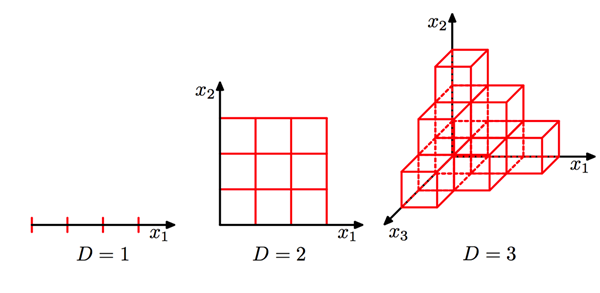
PCA can also be used to filter noisy datasets, such as image compression. The first principal component expresses the most amount of variance. Each additional component expresses less variance and more noise, so representing the data with a smaller subset of principal components preserves the signal and discards the noise.

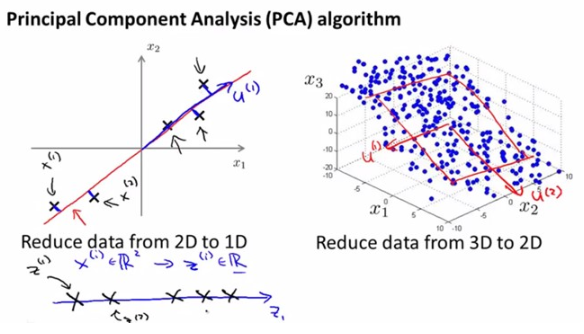

In [61]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy as sc
#  Enable inline plotting from matplotlib
%matplotlib inline



iris = load_iris()
#This data sets consists of 3 different types of irises’ 
#(Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray
#The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

#  There are four measurements from each flower:
#    sepal-length
#    sepal-width  
#    petal-length
#    petal-width
#  The species of each flower has been identified by an expert botanist.
#  This is an example of supervised learning.

In [62]:
data = iris.data
feature_names = iris.feature_names
y=iris.target
df = pd.DataFrame(data,columns=feature_names)

In [63]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [64]:
df.shape

(150, 4)

In [65]:
df["species"] = y

In [66]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [68]:
x=data
pca = PCA(n_components=2,whiten=True)  # whiten = normalization
pca.fit(x)
x_pca = pca.transform(x)
print("Variance ratio : ",pca.explained_variance_ratio_)

Variance ration :  [0.92461872 0.05306648]


In [69]:
print("Sum : ",sum(pca.explained_variance_ratio_))

Sum :  0.9776852063187949


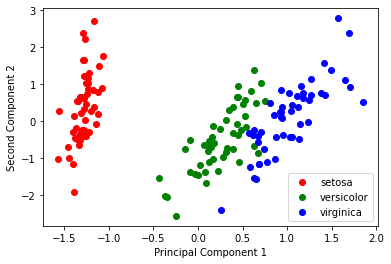

In [74]:
# 2D
df["pc1"] = x_pca[:,0]
df["pc2"] = x_pca[:,1]
color = ["red","green","blue"]

for each in range(3):
    plt.scatter(df.pc1[df.species == each],df.pc2[df.species == each],color=color[each],label=iris.target_names[each])
    
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Second Component 2")
plt.show()

# DIMENSION REDUCTION 4D >> 2D